In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from de import initialize_generation, mutation, crossover, likelihood, selection

In [2]:
X = initialize_generation(2, [(0, 100), (0, 100)])
X

[INFO]: initialized first generation with 20 unique base vectors of dimension 2


[array([ 1.74777943, 49.89899461]),
 array([49.28001792, 74.75396824]),
 array([95.87790397, 48.38240518]),
 array([77.97625921, 50.30396996]),
 array([99.20650604, 25.37085417]),
 array([58.70065346, 68.91736351]),
 array([48.13034165,  8.35595741]),
 array([69.63713742, 32.0226228 ]),
 array([90.94636984, 35.96824945]),
 array([ 3.97913467, 93.32851098]),
 array([69.39191742, 83.5777659 ]),
 array([ 5.98713854, 80.10290232]),
 array([90.0154436 ,  2.37330529]),
 array([18.15516471, 99.77509699]),
 array([72.43391744, 39.36795146]),
 array([91.20057293, 61.22290369]),
 array([45.61819321, 41.78336862]),
 array([45.56529997, 94.49221184]),
 array([30.13662921, 71.3578676 ]),
 array([10.21896216, 36.22628993])]

In [3]:
V = mutation(X, 0.8)
len(np.unique(V, axis=0))

[INFO]: created array of donor vectors


20

In [4]:
U = crossover(X, V, 0.8)
U

[INFO]: created array of trial vectors


array([[ 89.09570259, -50.74510337],
       [ 49.28001792,  10.74577644],
       [ 10.19421779, 117.99739872],
       [ 87.47806778, 106.77512646],
       [105.02225799, -18.53657889],
       [ 86.43930336,  86.73426722],
       [ -4.60118261,  -0.94005103],
       [  9.14721206, 123.06813451],
       [ 97.13689352,  35.17706662],
       [ 89.62133443,  48.10463768],
       [ 50.55871354,  53.68254869],
       [  5.98713854, -25.03067398],
       [ 25.41926182,  -8.81114097],
       [123.32669043, -38.8628086 ],
       [ 95.21982115,  12.2163568 ],
       [ 14.73632571,  50.58710975],
       [ 44.37933765,  41.78336862],
       [108.24795886,  64.37940501],
       [122.42012567, -32.46390217],
       [  3.75749818,  23.15706565]])

In [5]:
L = [likelihood(U[i], [10,10]) for i in range(len(U))]
L

TypeError: likelihood() takes 2 positional arguments but 3 were given

In [6]:
X = np.array(X)

In [9]:
new_X = selection(X, U, [10, 10])
new_X

IndexError: tuple index out of range

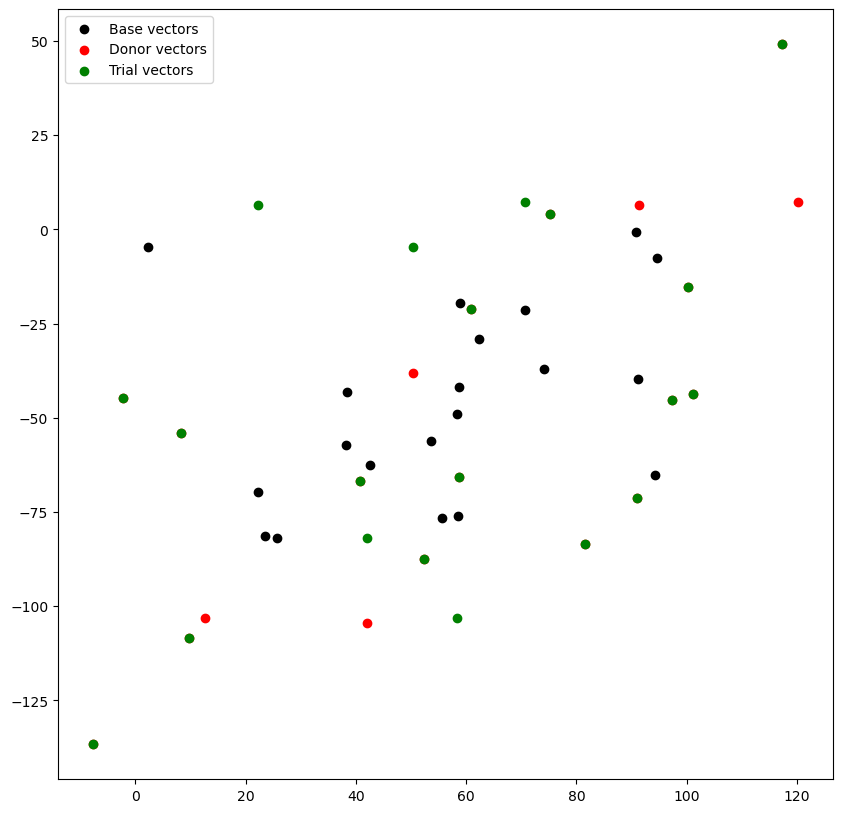

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(X.T[0], X.T[1], color='black', label="Base vectors")
ax.scatter(V.T[0], V.T[1], color='red', label="Donor vectors")
ax.scatter(U.T[0], U.T[1], color='green', label="Trial vectors")

ax.legend()